In [1]:
# 图像分析与理解
# 模糊方法实验 - 阈值分割
# 东南大学，卓旭，212138

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from helper import *

(267, 256)


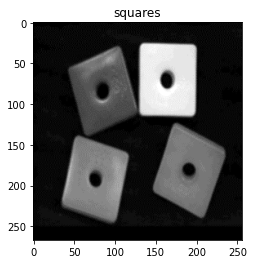

In [3]:
# 1 - 读取squares.txt文件
squares = readImageUint8('squares.txt')
print(squares.shape)
display(squares, 'squares')

In [4]:
# 2 - Otsu阈值分割
# 计算sigma^2(t)
def calcOtsuSigma2t(img, t):
    maskN0 = img < t
    maskN1 = img >= t
    N0 = np.sum(maskN0)
    N1 = np.sum(maskN1)
    mu0 = np.mean(img[img < t]) if N0 > 0 else 0
    mu1 = np.mean(img[img >= t]) if N1 > 0 else 0
    mu = np.mean(img)
    p0 = N0 / (N0 + N1)
    p1 = N1 / (N0 + N1)
    sigma2t = p0 * (mu0 - mu) ** 2 + p1 * (mu1 - mu) ** 2
    
    return sigma2t

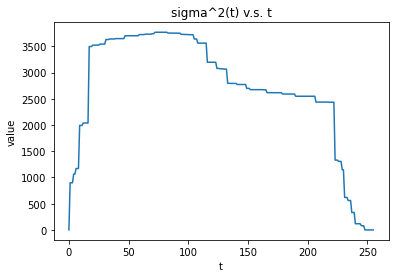

In [5]:
xs = np.arange(0, 255 + 1)
sigma2ts = [calcOtsuSigma2t(squares, t) for t in xs]
plt.figure()
plt.plot(np.arange(0, 255 + 1), sigma2ts); plt.title('sigma^2(t) v.s. t'); plt.xlabel('t'); plt.ylabel('value')
plt.show()

In [6]:
OtsuTh = xs[np.argmax(sigma2ts)]
OtsuTh

78

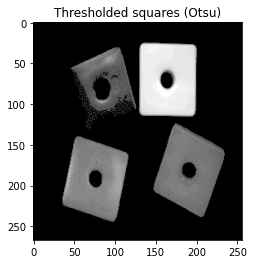

In [7]:
mask = squares <= OtsuTh
res = squares.copy()
res[mask] = 0
display(res, 'Thresholded squares (Otsu)')

In [8]:
# 3 - 模糊阈值分割
def calcFuzzyEntropy(img, t):
    N0 = np.sum(img < t)
    N1 = np.sum(img >= t)
    mu0 = np.mean(img[img < t]) if N0 > 0 else 0
    mu1 = np.mean(img[img >= t]) if N1 > 0 else 0
    # 对于每个像素计算隶属度
    C = 256
    def muXX(x):
        if x < t:
            return 1 / (1 + np.abs(x - mu0) / C)
        else:
            return 1 / (1 + np.abs(x - mu1) / C)
    muMap = np.array(list(map(muXX, img.astype(np.float32).flatten())))
    # 计算每个像素的熵
    SMap = -muMap * np.log(muMap + 1e-7) - (1 - muMap) * np.log(1 - muMap + 1e-7)
    # 计算熵和
    S = np.sum(SMap)
    
    return S

100%|█| 256/256 


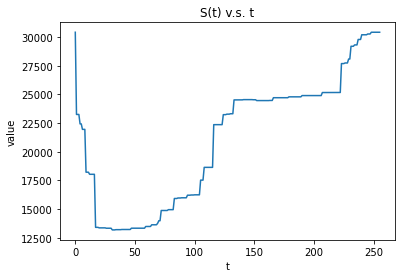

In [9]:
xs = np.arange(0, 255 + 1)
Sts = [calcFuzzyEntropy(squares, t) for t in tqdm(xs)]
plt.figure()
plt.plot(np.arange(0, 255 + 1), Sts); plt.title('S(t) v.s. t'); plt.xlabel('t'); plt.ylabel('value')
plt.show()

In [10]:
FuzzyTh = xs[np.argmin(Sts)]
FuzzyTh

31

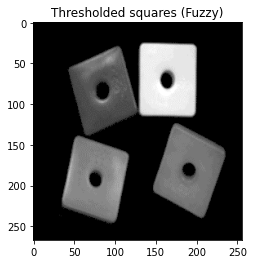

In [11]:
mask = squares <= FuzzyTh
res = squares.copy()
res[mask] = 0
display(res, 'Thresholded squares (Fuzzy)')